<a href="https://colab.research.google.com/github/ErmekZhumagulov/prognosis-data-to-next-year/blob/main/main2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import keras as k
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import io
from keras.models import Sequential
from keras.layers import Dense, Dropout
import tensorflow as tf
from tensorflow.keras.layers import Normalization
from keras.models import Model
from keras.layers import * 

In [37]:
# load data 2021 2022 2023 (using for x_train, x_test, x_predict)
data_load = files.upload()
df = pd.ExcelFile(io.BytesIO(data_load[r'KPIs.xlsx']))
sheet_df = df.parse(12)

Saving KPIs.xlsx to KPIs (1).xlsx


In [38]:
# load data electrocity (using for y_train_electrocity and y_test_electrocity)
data_load_electrocity = files.upload()
df_electrocity = pd.ExcelFile(io.BytesIO(data_load_electrocity[r'щитовая_новая_таблица.xlsx']))
sheet_electrocity = df_electrocity.parse(3)

Saving щитовая_новая_таблица.xlsx to щитовая_новая_таблица (1).xlsx


In [39]:
# load data steam (using for y_test_steam and y_train_steam)
data_load_steam = files.upload()
df_steam = pd.ExcelFile(io.BytesIO(data_load_steam[r'ЖУРНАЛ УЧЁТА ПАРАМЕТРОВ ПАРА.xls']))

Saving ЖУРНАЛ УЧЁТА ПАРАМЕТРОВ ПАРА.xls to ЖУРНАЛ УЧЁТА ПАРАМЕТРОВ ПАРА (1).xls


In [40]:
# load data water (using for y_test_water and y_train_water)
data_load_water = files.upload()
df_water = pd.ExcelFile(io.BytesIO(data_load_water[r'расход воды по цехам Оригинал.xls']))

Saving расход воды по цехам Оригинал.xls to расход воды по цехам Оригинал (1).xls


In [59]:
# x_train

#2021
x_train_2021 = []
for k in range(105,117):
  column_x_train_2021 = sheet_df['Unnamed: ' + str(k)]
  list_x_train_2021 = np.array(column_x_train_2021[3:253])
  df_x_train_2021 = pd.DataFrame(list_x_train_2021)
  fillna_x_train_2021 = df_x_train_2021.fillna(0)
  for i in range(0, len(fillna_x_train_2021)):
    for j in np.array(fillna_x_train_2021)[i]:
      x_train_2021.append(j)

#2022
column_x_train_jan_2022 = sheet_df['2022 ФАКТ КГ']
list_x_train_jan_2022 = np.array(column_x_train_jan_2022[3:253])
df_x_train_jan_2022 = pd.DataFrame(list_x_train_jan_2022)
fillna_x_train_jan_2022 = df_x_train_jan_2022.fillna(0)
x_train_jan_2022 = []
for i in range(0, len(fillna_x_train_jan_2022)):
  for j in np.array(fillna_x_train_jan_2022)[i]:
    x_train_jan_2022.append(j)

x_train_rest_2022 = []
for k in range(11,18):
  column_x_train_rest_2022 = sheet_df['Unnamed: ' + str(k)]
  list_x_train_rest_2022 = np.array(column_x_train_rest_2022[3:253])
  df_x_train_rest_2022 = pd.DataFrame(list_x_train_rest_2022)
  fillna_x_train_rest_2022 = df_x_train_rest_2022.fillna(0)
  for i in range(0, len(fillna_x_train_rest_2022)):
    for j in np.array(fillna_x_train_rest_2022)[i]:
      x_train_rest_2022.append(j)

# x_train_jan_2022
# x_train_feb_2022 = x_train_rest_2022[0:127]
# x_train_mar_2022 = x_train_rest_2022[127:254]
# x_train_apr_2022 = x_train_rest_2022[254:381]
# x_train_may_2022 = x_train_rest_2022[381:508]
# x_train_jun_2022 = x_train_rest_2022[508:635]
# x_train_jul_2022 = x_train_rest_2022[635:762]
# x_train_aug_2022 = x_train_rest_2022[762:889]

x_train_jan_2021 = x_train_2021[0:250]
x_train_feb_2021 = x_train_2021[250:500]
x_train_mar_2021 = x_train_2021[500:750]
x_train_apr_2021 = x_train_2021[750:1000]
x_train_may_2021 = x_train_2021[1000:1250]
x_train_jun_2021 = x_train_2021[1250:1500]
x_train_jul_2021 = x_train_2021[1500:1750]
x_train_aug_2021 = x_train_2021[1750:2000]
x_train_sep_2021 = x_train_2021[2000:2250]
x_train_oct_2021 = x_train_2021[2250:2500]
x_train_nov_2021 = x_train_2021[2500:2750]
x_train_dec_2021 = x_train_2021[2750:3000]

x_train_jan_2022
x_train_feb_2022 = x_train_rest_2022[0:250]
x_train_mar_2022 = x_train_rest_2022[250:500]
x_train_apr_2022 = x_train_rest_2022[500:750]
x_train_may_2022 = x_train_rest_2022[750:1000]
x_train_jun_2022 = x_train_rest_2022[1000:1250]
x_train_jul_2022 = x_train_rest_2022[1250:1500]
x_train_aug_2022 = x_train_rest_2022[1500:1750]

list_kg_x_train = []
list_kg_x_train.append(x_train_jan_2021)
list_kg_x_train.append(x_train_feb_2021)
list_kg_x_train.append(x_train_mar_2021)
list_kg_x_train.append(x_train_apr_2021)
list_kg_x_train.append(x_train_may_2021)
list_kg_x_train.append(x_train_jun_2021)
list_kg_x_train.append(x_train_jul_2021)
list_kg_x_train.append(x_train_aug_2021)
list_kg_x_train.append(x_train_sep_2021)
list_kg_x_train.append(x_train_oct_2021)
list_kg_x_train.append(x_train_nov_2021)
list_kg_x_train.append(x_train_dec_2021)
list_kg_x_train.append(x_train_jan_2022)
list_kg_x_train.append(x_train_feb_2022)
list_kg_x_train.append(x_train_mar_2022)
list_kg_x_train.append(x_train_apr_2022)
list_kg_x_train.append(x_train_may_2022)
list_kg_x_train.append(x_train_jun_2022)
list_kg_x_train.append(x_train_jul_2022)
list_kg_x_train.append(x_train_aug_2022)

x_train = np.array(list_kg_x_train) / 1000

print(len(x_train))
x_train

20


array([[15.05674   ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , 19.92384   , 19.90351   , ...,  0.        ,
         0.        ,  0.        ],
       [24.3545    , 20.34033   , 19.88651   , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        , 19.79589   , ...,  0.        ,
         0.        ,  0.        ],
       [25.05825446, 24.87999691, 24.79725468, ...,  0.        ,
         0.        ,  0.        ],
       [40.12710067, 66.76529953, 30.20055814, ...,  0.        ,
         0.        ,  0.        ]])

In [60]:
# x_test

x_test_rest = []
for k in range(18,21):
  column_x_test_rest = sheet_df['Unnamed: ' + str(k)]
  list_x_test_rest = np.array(column_x_test_rest[3:253])
  df_x_test_rest = pd.DataFrame(list_x_test_rest)
  fillna_x_test_rest = df_x_test_rest.fillna(0)
  for i in range(0, len(fillna_x_test_rest)):
    for j in np.array(fillna_x_test_rest)[i]:
      x_test_rest.append(j)

x_test_sep = x_test_rest[0:250]
x_test_oct = x_test_rest[250:500]
x_test_nov = x_test_rest[500:750]

list_kg_x_test = []
list_kg_x_test.append(x_test_sep)
list_kg_x_test.append(x_test_oct)
list_kg_x_test.append(x_test_nov)

x_test = np.array(list_kg_x_test) / 1000

print(len(x_test))
x_test

3


array([[ 45.5026896 ,  19.64555874,  44.94977038,   0.        ,
          0.        ,   1.3401    ,  30.23601   ,   2.76807825,
          0.        ,   1.4013    ,   7.9398    ,   0.        ,
          0.        ,   2.34255   ,   3.89088   ,   1.2903    ,
          0.        ,   0.        ,   0.58464   ,   0.91808   ,
          0.39276   ,   0.95152   ,  58.53863   ,  94.057942  ,
          3.79344   ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   1.69938   ,
          0.        ,   4.75326   ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   3.04      ,  11.99945   ,   5.93465   ,
          0.        ,   0.        ,   0.        ,   0.        ,
         24.9679    ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          5.62464   ,   3.21624   ,   2.70918   ,   6.49296   ,
         16.99623   ,  12.09249   ,   4.

In [61]:
# x_predict

#2023
x_predict_2023 = []
for k in range(118,130):
  column_x_predict_2023 = sheet_df['Unnamed: ' + str(k)]
  list_x_predict_2023 = np.array(column_x_predict_2023[3:253])
  df_x_predict_2023 = pd.DataFrame(list_x_predict_2023)
  fillna_x_predict_2023 = df_x_predict_2023.fillna(0)
  for i in range(0, len(fillna_x_predict_2023)):
    for j in np.array(fillna_x_predict_2023)[i]:
      x_predict_2023.append(j)

x_predict_jan_2023 = x_predict_2023[0:250]
x_predict_feb_2023 = x_predict_2023[250:500]
x_predict_mar_2023 = x_predict_2023[500:750]
x_predict_apr_2023 = x_predict_2023[750:1000]
x_predict_may_2023 = x_predict_2023[1000:1250]
x_predict_jun_2023 = x_predict_2023[1250:1500]
x_predict_jul_2023 = x_predict_2023[1500:1750]
x_predict_aug_2023 = x_predict_2023[1750:2000]
x_predict_sep_2023 = x_predict_2023[2000:2250]
x_predict_oct_2023 = x_predict_2023[2250:2500]
x_predict_nov_2023 = x_predict_2023[2500:2750]
x_predict_dec_2023 = x_predict_2023[2750:3000]

list_kg_x_predict = []
list_kg_x_predict.append(x_predict_jan_2023)
list_kg_x_predict.append(x_predict_feb_2023)
list_kg_x_predict.append(x_predict_mar_2023)
list_kg_x_predict.append(x_predict_apr_2023)
list_kg_x_predict.append(x_predict_may_2023)
list_kg_x_predict.append(x_predict_jun_2023)
list_kg_x_predict.append(x_predict_jul_2023)
list_kg_x_predict.append(x_predict_aug_2023)
list_kg_x_predict.append(x_predict_sep_2023)
list_kg_x_predict.append(x_predict_oct_2023)
list_kg_x_predict.append(x_predict_nov_2023)
list_kg_x_predict.append(x_predict_dec_2023)

x_predict = np.array(list_kg_x_predict)

print(len(x_predict))
x_predict

12


array([[30., 60., 60., ..., 25.,  0.,  0.],
       [25., 35., 60., ...,  0.,  0.,  0.],
       [30., 55., 60., ...,  0.,  0.,  0.],
       ...,
       [35., 60., 65., ...,  0.,  0., 25.],
       [40., 50., 70., ...,  0., 25., 25.],
       [35., 40., 50., ..., 25.,  0.,  0.]])

In [62]:
# y_train_electrocity

# 2021
column_y_train_electrocity = sheet_electrocity['Итого']
list_y_train_electrocity_jan_2021 = np.sum(np.array(column_y_train_electrocity[2076:2107]))
list_y_train_electrocity_feb_2021 = np.sum(np.array(column_y_train_electrocity[2107:2135]))
list_y_train_electrocity_mar_2021 = np.sum(np.array(column_y_train_electrocity[2135:2166]))
list_y_train_electrocity_apr_2021 = np.sum(np.array(column_y_train_electrocity[2166:2196]))
list_y_train_electrocity_may_2021 = np.sum(np.array(column_y_train_electrocity[2196:2227]))
list_y_train_electrocity_jun_2021 = np.sum(np.array(column_y_train_electrocity[2227:2257]))
list_y_train_electrocity_jul_2021 = np.sum(np.array(column_y_train_electrocity[2257:2288]))
list_y_train_electrocity_aug_2021 = np.sum(np.array(column_y_train_electrocity[2288:2319]))
list_y_train_electrocity_sep_2021 = np.sum(np.array(column_y_train_electrocity[2319:2349]))
list_y_train_electrocity_oct_2021 = np.sum(np.array(column_y_train_electrocity[2349:2380]))
list_y_train_electrocity_nov_2021 = np.sum(np.array(column_y_train_electrocity[2380:2410]))
list_y_train_electrocity_dec_2021 = np.sum(np.array(column_y_train_electrocity[2410:2441]))

y_train_electrocity_2021 = []
y_train_electrocity_2021.append(list_y_train_electrocity_jan_2021)
y_train_electrocity_2021.append(list_y_train_electrocity_feb_2021)
y_train_electrocity_2021.append(list_y_train_electrocity_mar_2021)
y_train_electrocity_2021.append(list_y_train_electrocity_apr_2021)
y_train_electrocity_2021.append(list_y_train_electrocity_may_2021)
y_train_electrocity_2021.append(list_y_train_electrocity_jun_2021)
y_train_electrocity_2021.append(list_y_train_electrocity_jul_2021)
y_train_electrocity_2021.append(list_y_train_electrocity_aug_2021)
y_train_electrocity_2021.append(list_y_train_electrocity_sep_2021)
y_train_electrocity_2021.append(list_y_train_electrocity_oct_2021)
y_train_electrocity_2021.append(list_y_train_electrocity_nov_2021)
y_train_electrocity_2021.append(list_y_train_electrocity_dec_2021)

#2022
list_y_train_electrocity_jan_2022 = np.sum(np.array(column_y_train_electrocity[2441:2472]))
list_y_train_electrocity_feb_2022 = np.sum(np.array(column_y_train_electrocity[2472:2500]))
list_y_train_electrocity_mar_2022 = np.sum(np.array(column_y_train_electrocity[2500:2531]))
list_y_train_electrocity_apr_2022 = np.sum(np.array(column_y_train_electrocity[2531:2561]))
list_y_train_electrocity_may_2022 = np.sum(np.array(column_y_train_electrocity[2561:2592]))
list_y_train_electrocity_jun_2022 = np.sum(np.array(column_y_train_electrocity[2592:2622]))
list_y_train_electrocity_jul_2022 = np.sum(np.array(column_y_train_electrocity[2622:2653]))
list_y_train_electrocity_aug_2022 = np.sum(np.array(column_y_train_electrocity[2653:2684]))

y_train_electrocity_2022 = []
y_train_electrocity_2022.append(list_y_train_electrocity_jan_2022)
y_train_electrocity_2022.append(list_y_train_electrocity_feb_2022)
y_train_electrocity_2022.append(list_y_train_electrocity_mar_2022)
y_train_electrocity_2022.append(list_y_train_electrocity_apr_2022)
y_train_electrocity_2022.append(list_y_train_electrocity_may_2022)
y_train_electrocity_2022.append(list_y_train_electrocity_jun_2022)
y_train_electrocity_2022.append(list_y_train_electrocity_jul_2022)
y_train_electrocity_2022.append(list_y_train_electrocity_aug_2022)

y_train_electrocity = y_train_electrocity_2021 + y_train_electrocity_2022
y_train_electrocity = np.array(y_train_electrocity)

print(len(y_train_electrocity))
y_train_electrocity

20


array([353883.8, 318059.1, 318574.2, 314342.3, 389890.3, 396334.1,
       468650.1, 433370.8, 344096.9, 333754.5, 292425.3, 300303.3,
       322291. , 314200.9, 324523.1, 321594.1, 386173.5, 404737.3,
       448884.4, 453449.6])

In [63]:
# y_test_electocity

column_y_test_electrocity = sheet_electrocity['Итого']
list_y_test_electrocity_sep_2022 = np.sum(np.array(column_y_test_electrocity[2684:2714]))
list_y_test_electrocity_oct_2022 = np.sum(np.array(column_y_test_electrocity[2714:2745]))
list_y_test_electrocity_nov_2022 = np.sum(np.array(column_y_test_electrocity[2745:2775]))

y_test_electrocity = []
y_test_electrocity.append(list_y_test_electrocity_sep_2022)
y_test_electrocity.append(list_y_test_electrocity_oct_2022)
y_test_electrocity.append(list_y_test_electrocity_nov_2022)

y_test_electrocity = np.array(y_test_electrocity)

print(len(y_test_electrocity))
y_test_electrocity

3


array([388516.7, 353459.6, 362175.9])

In [64]:
# y_train_steam

y_train_steam_jan_2021 = df_steam.parse(129)['Unnamed: 4'][33]
y_train_steam_feb_2021 = df_steam.parse(130)['Unnamed: 4'][30]
y_train_steam_mar_2021 = df_steam.parse(131)['Unnamed: 4'][33]
y_train_steam_apr_2021 = df_steam.parse(132)['Unnamed: 4'][33]
y_train_steam_may_2021 = df_steam.parse(133)['Unnamed: 4'][33]
y_train_steam_jun_2021 = df_steam.parse(134)['Unnamed: 4'][33]
y_train_steam_jul_2021 = df_steam.parse(135)['Unnamed: 4'][33]
y_train_steam_aug_2021 = df_steam.parse(136)['W(с)т1_ГКал'][32]
y_train_steam_sep_2021 = df_steam.parse(137)['W(с)т1_ГКал'][32]
y_train_steam_oct_2021 = df_steam.parse(138)['W(с)т1_ГКал'][32]
y_train_steam_nov_2021 = df_steam.parse(139)['W(с)т1_ГКал'][32]
y_train_steam_dec_2021 = df_steam.parse(140)['W(с)т1_ГКал'][32]
y_train_steam_jan_2022 = df_steam.parse(141)['W(с)т1_ГКал'][32]
y_train_steam_feb_2022 = df_steam.parse(142)['W(с)т1_ГКал'][32]
y_train_steam_mar_2022 = df_steam.parse(143)['W(с)т1_ГКал'][32]
y_train_steam_apr_2022 = np.sum(df_steam.parse(144)['W(с)т1_ГКал'][0:30])
y_train_steam_may_2022 = np.sum(np.append(df_steam.parse(144)['W(с)т1_ГКал'][30], df_steam.parse(145)['W(с)т1_ГКал'][0:30]))
y_train_steam_jun_2022 = np.sum(np.append(df_steam.parse(145)['W(с)т1_ГКал'][30], df_steam.parse(146)['W(с)т1_ГКал'][0:29]))
y_train_steam_jul_2022 = np.sum(np.append(df_steam.parse(146)['W(с)т1_ГКал'][29], df_steam.parse(147)['W(с)т1_ГКал'][0:30]))
y_train_steam_aug_2022 = np.sum(np.append(df_steam.parse(147)['W(с)т1_ГКал'][30], df_steam.parse(148)['W(с)т1_ГКал'][0:30]))

y_train_steam = []
y_train_steam.append(y_train_steam_jan_2021)
y_train_steam.append(y_train_steam_feb_2021)
y_train_steam.append(y_train_steam_mar_2021)
y_train_steam.append(y_train_steam_apr_2021)
y_train_steam.append(y_train_steam_may_2021)
y_train_steam.append(y_train_steam_jun_2021)
y_train_steam.append(y_train_steam_jul_2021)
y_train_steam.append(y_train_steam_aug_2021)
y_train_steam.append(y_train_steam_sep_2021)
y_train_steam.append(y_train_steam_oct_2021)
y_train_steam.append(y_train_steam_nov_2021)
y_train_steam.append(y_train_steam_dec_2021)
y_train_steam.append(y_train_steam_jan_2022)
y_train_steam.append(y_train_steam_feb_2022)
y_train_steam.append(y_train_steam_mar_2022)
y_train_steam.append(y_train_steam_apr_2022)
y_train_steam.append(y_train_steam_may_2022)
y_train_steam.append(y_train_steam_jun_2022)
y_train_steam.append(y_train_steam_jul_2022)
y_train_steam.append(y_train_steam_aug_2022)

y_train_steam = np.array(y_train_steam)

print(len(y_train_steam))
y_train_steam

20


array([956.6 , 845.4 , 868.4 , 735.4 , 860.4 , 778.9 , 824.3 , 878.3 ,
       771.1 , 953.7 , 873.7 , 775.4 , 795.4 , 780.7 , 812.68, 765.  ,
       798.4 , 746.44, 796.95, 868.63])

In [65]:
# y_test_steam

sheet_steam_aug_2022 = df_steam.parse(148)
sheet_steam_sep_2022 = df_steam.parse(149)
sheet_steam_oct_2022 = df_steam.parse(150)
sheet_steam_nov_2022 = df_steam.parse(151)

column_y_test_steam_1_sep_2022 = sheet_steam_aug_2022['W(с)т1_ГКал']
column_y_test_steam_sep_2022 = sheet_steam_sep_2022['W(с)т1_ГКал']
column_y_test_steam_1_oct_2022 = sheet_steam_sep_2022['W(с)т1_ГКал']
column_y_test_steam_oct_2022 = sheet_steam_oct_2022['W(с)т1_ГКал']
column_y_test_steam_1_nov_2022 = sheet_steam_oct_2022['W(с)т1_ГКал']
column_y_test_steam_nov_2022 = sheet_steam_nov_2022['W(с)т1_ГКал']

y_test_steam_sep = np.append(column_y_test_steam_1_sep_2022[30], column_y_test_steam_sep_2022[0:29])
y_test_steam_oct = np.append(column_y_test_steam_1_oct_2022[29], column_y_test_steam_oct_2022[0:30])
y_test_steam_nov = np.append(column_y_test_steam_1_nov_2022[30], column_y_test_steam_nov_2022[0:29])

y_test_steam_sep = np.sum(y_test_steam_sep)
y_test_steam_oct = np.sum(y_test_steam_oct)
y_test_steam_nov = np.sum(y_test_steam_nov)

y_test_steam = []
y_test_steam.append(y_test_steam_sep)
y_test_steam.append(y_test_steam_oct)
y_test_steam.append(y_test_steam_nov)
y_test_steam = np.array(y_test_steam)

print(len(y_test_steam))
y_test_steam

3


array([856.17, 916.7 , 842.  ])

In [66]:
# y_train_water

y_train_water_jan_2021 = np.sum(df_water.parse(1)['Unnamed: 39'][4981:5012])
y_train_water_feb_2021 = np.sum(df_water.parse(1)['Unnamed: 39'][5012:5040])
y_train_water_mar_2021 = np.sum(df_water.parse(1)['Unnamed: 39'][5040:5071])
y_train_water_apr_2021 = np.sum(df_water.parse(1)['Unnamed: 39'][5071:5101])
y_train_water_may_2021 = np.sum(df_water.parse(1)['Unnamed: 39'][5101:5132])
y_train_water_jun_2021 = np.sum(df_water.parse(1)['Unnamed: 39'][5132:5162])
y_train_water_jul_2021 = np.sum(df_water.parse(1)['Unnamed: 39'][5162:5193])
y_train_water_aug_2021 = np.sum(df_water.parse(1)['Unnamed: 39'][5193:5224])
y_train_water_sep_2021 = np.sum(df_water.parse(1)['Unnamed: 39'][5224:5254])
y_train_water_oct_2021 = np.sum(df_water.parse(1)['Unnamed: 39'][5254:5285])
y_train_water_nov_2021 = np.sum(df_water.parse(1)['Unnamed: 39'][5285:5315])
y_train_water_dec_2021 = np.sum(df_water.parse(1)['Unnamed: 39'][5315:5346])
y_train_water_jan_2022 = np.sum(df_water.parse(1)['Unnamed: 39'][5346:5377])
y_train_water_feb_2022 = np.sum(df_water.parse(1)['Unnamed: 39'][5377:5405])
y_train_water_mar_2022 = np.sum(df_water.parse(1)['Unnamed: 39'][5405:5436])
y_train_water_apr_2022 = np.sum(df_water.parse(1)['Unnamed: 39'][5436:5466])
y_train_water_may_2022 = np.sum(df_water.parse(1)['Unnamed: 39'][5466:5497])
y_train_water_jun_2022 = np.sum(df_water.parse(1)['Unnamed: 39'][5497:5527])
y_train_water_jul_2022 = np.sum(df_water.parse(1)['Unnamed: 39'][5527:5558])
y_train_water_aug_2022 = np.sum(df_water.parse(1)['Unnamed: 39'][5558:5589])

y_train_water = []
y_train_water.append(y_train_water_jan_2021)
y_train_water.append(y_train_water_feb_2021)
y_train_water.append(y_train_water_mar_2021)
y_train_water.append(y_train_water_apr_2021)
y_train_water.append(y_train_water_may_2021)
y_train_water.append(y_train_water_jun_2021)
y_train_water.append(y_train_water_jul_2021)
y_train_water.append(y_train_water_aug_2021)
y_train_water.append(y_train_water_sep_2021)
y_train_water.append(y_train_water_oct_2021)
y_train_water.append(y_train_water_nov_2021)
y_train_water.append(y_train_water_dec_2021)
y_train_water.append(y_train_water_jan_2022)
y_train_water.append(y_train_water_feb_2022)
y_train_water.append(y_train_water_mar_2022)
y_train_water.append(y_train_water_apr_2022)
y_train_water.append(y_train_water_may_2022)
y_train_water.append(y_train_water_jun_2022)
y_train_water.append(y_train_water_jul_2022)
y_train_water.append(y_train_water_aug_2022)

y_train_water = np.array(y_train_water)

print(len(y_train_water))
y_train_water

20


array([10488, 11080, 10484,  9787, 12053, 12014, 13555, 15211, 11771,
       13170, 11293,  9322,  9633,  9231,  9828,  9107, 10876,  9884,
       11343, 12413])

In [67]:
# y_test_water

y_test_water_sep_2022 = np.sum(df_water.parse(1)['Unnamed: 39'][5589:5619])
y_test_water_oct_2022 = np.sum(df_water.parse(1)['Unnamed: 39'][5619:5650])
y_test_water_nov_2022 = np.sum(df_water.parse(1)['Unnamed: 39'][5650:5680])

y_test_water = []
y_test_water.append(y_test_water_sep_2022)
y_test_water.append(y_test_water_oct_2022)
y_test_water.append(y_test_water_nov_2022)
y_test_water = np.array(y_test_water)

print(len(y_test_water))
y_test_water

3


array([10404, 11613, 11753])

In [68]:
# data normalization

# combined_batch = tf.constant(np.expand_dims(np.stack([x_test]), axis=-1), dtype=tf.float32)

# normalization_layer = Normalization()

# normalization_layer.adapt(combined_batch)

# normalization_layer(x_test)


x_train /= 250
x_test /= 250
x_predict /= 250
y_train_electrocity /= 470000
y_test_electrocity /= 470000
y_train_steam /= 960
y_test_steam /= 960
y_train_water = y_train_water / 15300
y_test_water = y_test_water / 15300

print(x_train)
print('--------------------------------------------------------------------------------------')
print(x_test)
print('--------------------------------------------------------------------------------------')
print(x_predict)
print('--------------------------------------------------------------------------------------')
print(y_train_electrocity)
print('--------------------------------------------------------------------------------------')
print(y_test_electrocity)
print('--------------------------------------------------------------------------------------')
print(y_train_steam)
print('--------------------------------------------------------------------------------------')
print(y_test_steam)
print('--------------------------------------------------------------------------------------')
print(y_train_water)
print('--------------------------------------------------------------------------------------')
print(y_test_water)

[[0.06022696 0.         0.         ... 0.         0.         0.        ]
 [0.         0.07969536 0.07961404 ... 0.         0.         0.        ]
 [0.097418   0.08136132 0.07954604 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.07918356 ... 0.         0.         0.        ]
 [0.10023302 0.09951999 0.09918902 ... 0.         0.         0.        ]
 [0.1605084  0.2670612  0.12080223 ... 0.         0.         0.        ]]
--------------------------------------------------------------------------------------
[[0.18201076 0.07858223 0.17979908 0.         0.         0.0053604
  0.12094404 0.01107231 0.         0.0056052  0.0317592  0.
  0.         0.0093702  0.01556352 0.0051612  0.         0.
  0.00233856 0.00367232 0.00157104 0.00380608 0.23415452 0.37623177
  0.01517376 0.         0.         0.         0.         0.
  0.         0.00679752 0.         0.01901304 0.         0.
  0.         0.         0.         0.         0.         0.01216
  0.0479978  0.0237386  0.   

In [ ]:
model = Sequential()
model.add(Dense(70, activation='tanh'))
model.add(Dropout(0.05))
model.add(Dense(48, activation='relu'))
model.add(Dropout(0.02))
model.add(Dense(1, activation='relu'))

model.compile(optimizer='Adam', loss='mse', metrics=['mae']) # mse - средне квадратичная ошибка      mae - средне абсолютная ошибка

fit_result = model.fit(x_test, y_test_electrocity, epochs=600, batch_size=2) # validation_split=0.2

In [188]:
inp = Input(shape=(250,))

h1 = Dense(120, activation='relu')(inp)
Dropout(0.05)
h2 = Dense(150, activation='tanh')(h1)
Dropout(0.02)
h3 = Dense(90, activation='tanh')(h2)
Dropout(0.03)
h_electrocity = Dense(16, activation='relu')(h3)
# Dropout(0.02)
output_electrocity = Dense(1, activation='relu')(h_electrocity)
h_steam = Dense(12, activation='relu')(h3)
# Dropout(0.02)
output_steam = Dense(1, activation='relu')(h_steam)
h_water = Dense(14, activation='relu')(h3)
# Dropout(0.02)
output_water = Dense(1, activation='relu')(h_water)

model = Model(inputs=inp, outputs=[output_electrocity, output_steam, output_water])

model.compile(optimizer='Adam', loss='mse', metrics=['mae']) # mse - средне квадратичная ошибка      mae - средне абсолютная ошибка

fit_result = model.fit(x_train, [y_train_electrocity, y_train_steam, y_train_water], epochs=20, batch_size=2, validation_split=0.2) # validation_split=0.2

Epoch 1/20
8/8 [==============================] - 1s 42ms/step - loss: 0.9185 - dense_255_loss: 0.2990 - dense_257_loss: 0.2677 - dense_259_loss: 0.3518 - dense_255_mae: 0.5233 - dense_257_mae: 0.4470 - dense_259_mae: 0.5803 - val_loss: 0.2987 - val_dense_255_loss: 0.1133 - val_dense_257_loss: 0.0137 - val_dense_259_loss: 0.1718 - val_dense_255_mae: 0.3187 - val_dense_257_mae: 0.1081 - val_dense_259_mae: 0.4130
Epoch 2/20
8/8 [==============================] - 0s 8ms/step - loss: 0.2056 - dense_255_loss: 0.0823 - dense_257_loss: 0.0716 - dense_259_loss: 0.0518 - dense_255_mae: 0.2626 - dense_257_mae: 0.2400 - dense_259_mae: 0.1883 - val_loss: 0.0435 - val_dense_255_loss: 0.0270 - val_dense_257_loss: 0.0112 - val_dense_259_loss: 0.0053 - val_dense_255_mae: 0.1264 - val_dense_257_mae: 0.0866 - val_dense_259_mae: 0.0699
Epoch 3/20
8/8 [==============================] - 0s 7ms/step - loss: 0.0752 - dense_255_loss: 0.0237 - dense_257_loss: 0.0387 - dense_259_loss: 0.0128 - dense_255_mae: 0.

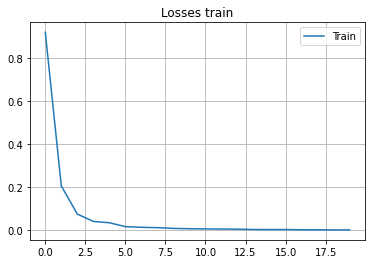

In [189]:
plt.title('Losses train')
plt.plot(fit_result.history['loss'], label='Train')
# plt.plot(fit_result.history['val_loss'], label='Validation')
plt.legend()
plt.grid(True)
plt.show()

In [190]:
print(y_test_electrocity * 470000)
print(y_test_steam * 960)
print(y_test_water * 15300)

[388516.7 353459.6 362175.9]
[856.17 916.7  842.  ]
[10404. 11613. 11753.]


In [191]:
predicted_data = model.predict(x_test)
print('-------------------------electrocity')
print(predicted_data[0] * 470000)
print('-------------------------steam')
print(predicted_data[1] * 960)
print('-------------------------water')
print(predicted_data[2] * 15300)

1/1 [==============================] - 0s 76ms/step
-------------------------electrocity
[[299197.80611992]
 [371350.82781315]
 [361785.18891335]]
-------------------------steam
[[ 884.6805]
 [ 971.1333]
 [1012.385 ]]
-------------------------water
[[10041.035]
 [11936.241]
 [12088.295]]
